In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\ASUS\Downloads\archive (4)\Travel.csv")

In [3]:
data

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [4]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [5]:
data.shape

(4888, 20)

In [6]:
data=data.drop_duplicates()

In [7]:
data.shape

(4888, 20)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [9]:
data.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


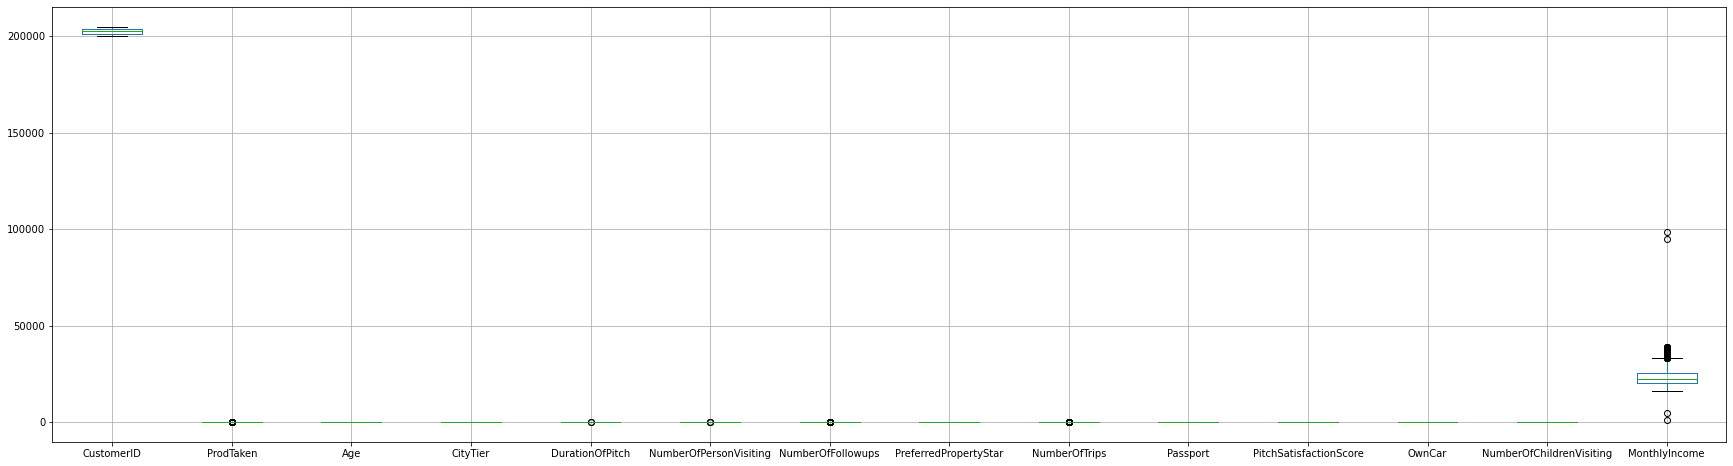

In [10]:
plt.figure(figsize=(30,8))
data.boxplot()
plt.show()

In [11]:
data["MonthlyIncome"].describe()

count     4655.000000
mean     23619.853491
std       5380.698361
min       1000.000000
25%      20346.000000
50%      22347.000000
75%      25571.000000
max      98678.000000
Name: MonthlyIncome, dtype: float64

In [12]:
#let's Explore some data about the outliers first
data[data["MonthlyIncome"]>50000]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
38,200038,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,NaN,Divorced,1.0,1,2,1,0.0,Executive,95000.0
2482,202482,0,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Basic,5.0,Divorced,2.0,1,2,1,1.0,Executive,98678.0


In [13]:
#we create a function for remove the outliers as there is no much outliers in the data but after that we also need to remove the outliers
def outlier_removal(data,column):
    mean=np.mean(data[column])
    std=np.std(data[column])
    cut_off=std*3
    upper_range,lower_range=mean+cut_off,mean-cut_off
    lower_range_index=list((data[data[column]<lower_range]).index)
    upper_range_index=list((data[data[column]>upper_range]).index)
    outlier_index=lower_range_index+upper_range_index
    data=data.drop(outlier_index,axis=0)
    return data

In [14]:
data=outlier_removal(data,"MonthlyIncome")

In [15]:
list(data[data["MonthlyIncome"]<7000].index)

[]

In [16]:
data.shape

(4884, 20)

<AxesSubplot:>

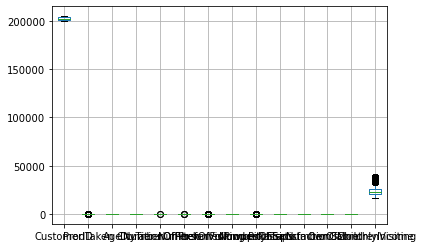

In [17]:
data.boxplot()

In [18]:
df=data.copy()

In [19]:
cat_features=data.select_dtypes(object).columns
cat_features

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [20]:
num_features=data.select_dtypes([int,float]).columns
num_features.isnull().sum()
df=df.dropna()

In [21]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [22]:
n_f_df=df.select_dtypes([int,float]).columns
print(n_f_df)

Index(['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')


In [23]:
df.shape

(4125, 20)

In [24]:
for i in n_f_df:
    df=outlier_removal(df,i)

In [25]:
df.shape

(4111, 20)

<AxesSubplot:>

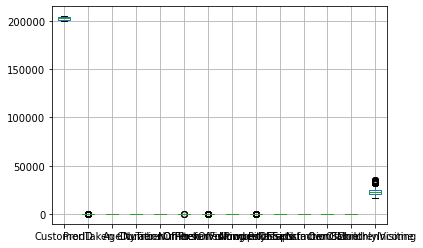

In [26]:
df.boxplot()

In [27]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000
mean,202526.258088,0.192897,37.204330,1.665045,15.556799,2.949161,3.739966,3.578935,3.277305,0.295305,3.059353,0.611287,1.223060,23138.988567
std,1409.689019,0.394621,9.164785,0.921198,8.226101,0.719620,1.007638,0.795078,1.778068,0.456235,1.362829,0.487517,0.853282,4276.991171
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,16009.000000
25%,201318.500000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20751.000000
50%,202601.000000,0.000000,36.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22412.000000
75%,203747.500000,0.000000,43.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25262.500000
max,204887.000000,1.000000,61.000000,3.000000,36.000000,5.000000,6.000000,5.000000,8.000000,1.000000,5.000000,1.000000,3.000000,35563.000000


In [28]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0


In [29]:
df.shape

(4111, 20)

In [30]:
cat_features

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [31]:
num_features

Index(['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')

In [32]:
len(cat_features)

6

In [33]:
len(num_features)

14

In [34]:
for i in cat_features:
    print(f"Column Name: {i}")
    print(df[i].value_counts())
    print("<<"*30)
    print("<"*60)

Column Name: TypeofContact
Self Enquiry       2906
Company Invited    1205
Name: TypeofContact, dtype: int64
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Column Name: Occupation
Salaried          1991
Small Business    1743
Large Business     375
Free Lancer          2
Name: Occupation, dtype: int64
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Column Name: Gender
Male       2453
Female     1503
Fe Male     155
Name: Gender, dtype: int64
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Column Name: ProductPitched
Basic           1611
Deluxe          1418
Standard         737
Super Deluxe     250
King              95
Name: ProductPitched, dtype: int64
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

In [35]:
df["Gender"].value_counts()

Male       2453
Female     1503
Fe Male     155
Name: Gender, dtype: int64

In [36]:
df["Gender"].value_counts()

Male       2453
Female     1503
Fe Male     155
Name: Gender, dtype: int64

In [37]:
df["Gender"].value_counts()

Male       2453
Female     1503
Fe Male     155
Name: Gender, dtype: int64

In [38]:
data["Gender"]=np.where(data["Gender"]=="Fe Male","Female",data["Gender"])

In [39]:
df["MaritalStatus"]=np.where(df["MaritalStatus"]=="Single","Unmarried",df["MaritalStatus"])

In [40]:
df["MaritalStatus"].value_counts()

Married      1986
Unmarried    1339
Divorced      786
Name: MaritalStatus, dtype: int64

In [41]:
data["MaritalStatus"]=np.where(data["MaritalStatus"]=="Single","Unmarried",data["MaritalStatus"])

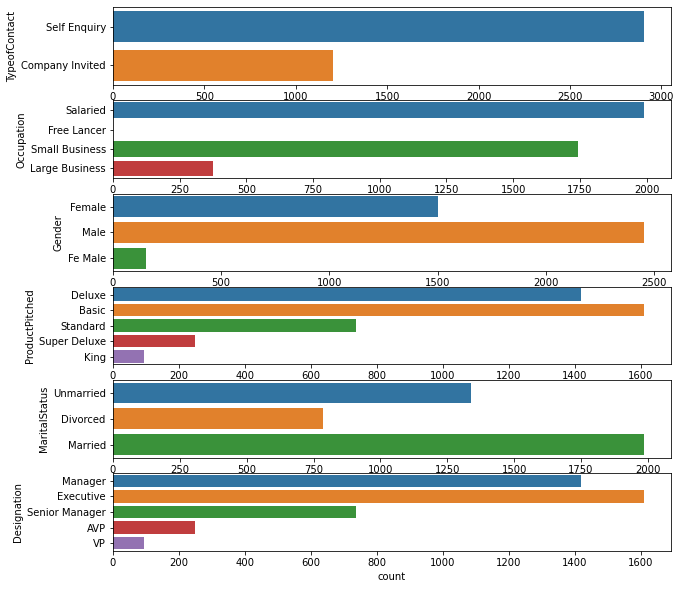

In [42]:
fig, ax= plt.subplots(6, figsize=(10,10), facecolor='w', edgecolor='k')
for i in range(len(cat_features)):
    sns.countplot(y=df[cat_features[i]],ax=ax[i])

In [43]:
for i in range(len(cat_features)):
    print(df.groupby(["ProdTaken",cat_features[i]]).size())
    print(">"*80)

ProdTaken  TypeofContact  
0          Company Invited     932
           Self Enquiry       2386
1          Company Invited     273
           Self Enquiry        520
dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
ProdTaken  Occupation    
0          Large Business     268
           Salaried          1632
           Small Business    1418
1          Free Lancer          2
           Large Business     107
           Salaried           359
           Small Business     325
dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
ProdTaken  Gender 
0          Fe Male     130
           Female     1231
           Male       1957
1          Fe Male      25
           Female      272
           Male        496
dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
ProdTaken  ProductPitched
0          Basic             1128
           Deluxe            1253
           K

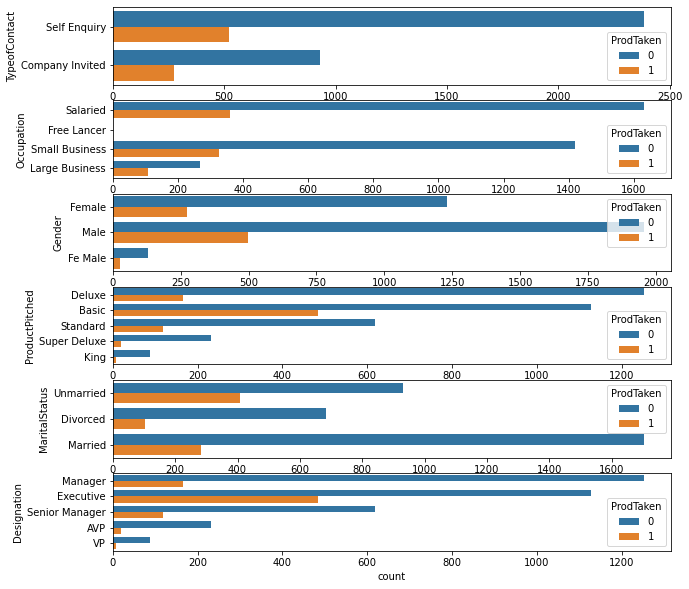

In [44]:
fig, ax= plt.subplots(6, figsize=(10,10), facecolor='w', edgecolor='k')
for i in range(len(cat_features)):
    sns.countplot(y=df[cat_features[i]],ax=ax[i],hue=df["ProdTaken"])

In [45]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Unmarried,1.0,0,5,1,1.0,Executive,18068.0


In [46]:
for i in range(len(num_features)):
    print("Column Name:",num_features[i])
    print(df[num_features[i]].value_counts())
    print(">>"*30)
    print(">>"*30)

Column Name: CustomerID
200000    1
203470    1
203361    1
203363    1
203364    1
         ..
201751    1
201753    1
201755    1
201756    1
204887    1
Name: CustomerID, Length: 4111, dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Column Name: ProdTaken
0    3318
1     793
Name: ProdTaken, dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Column Name: Age
36.0    215
35.0    214
30.0    187
31.0    187
34.0    187
33.0    178
32.0    177
37.0    176
38.0    170
29.0    164
39.0    143
41.0    135
28.0    135
27.0    125
40.0    123
42.0    116
43.0    106
46.0    104
45.0     96
26.0     91
44.0     89
50.0     74
47.0     63
25.0     63
51.0     60
49.0     57
48.0     55
52.0     54
55.0     52
53.0     51
54.0     51
24.0     46
23.0     46
22.0     42
59.0     40
21.0     39
20.0     36
56.0     33
58.0     

In [47]:
df.groupby("ProdTaken")["MonthlyIncome"].sum()


ProdTaken
0    77746588.0
1    17377794.0
Name: MonthlyIncome, dtype: float64

In [48]:
df=df.drop(["CustomerID","MonthlyIncome"],axis=1)

In [49]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive
5,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Unmarried,1.0,0,5,1,1.0,Executive


In [50]:
num_features=df.select_dtypes([float,int]).columns
num_features

Index(['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting'],
      dtype='object')

In [51]:
df["Age"].describe()

count    4111.000000
mean       37.204330
std         9.164785
min        18.000000
25%        31.000000
50%        36.000000
75%        43.000000
max        61.000000
Name: Age, dtype: float64

In [52]:
df["Age"]=pd.cut(x=df["Age"],bins=[18,25,36,45,60,100],labels=["18-25","26-35","36-45","46-60","60+"])

In [53]:
df["Age"]

0       36-45
1       46-60
2       36-45
3       26-35
5       26-35
        ...  
4883    46-60
4884    26-35
4885    46-60
4886    18-25
4887    26-35
Name: Age, Length: 4111, dtype: category
Categories (5, object): ['18-25' < '26-35' < '36-45' < '46-60' < '60+']

<AxesSubplot:xlabel='count', ylabel='Age'>

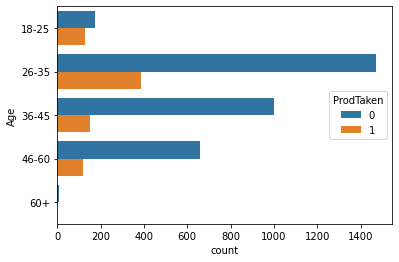

In [54]:
sns.countplot(y=df["Age"],hue=df["ProdTaken"])

In [55]:
df["DurationOfPitch"].value_counts()

9.0     410
7.0     310
8.0     286
6.0     269
15.0    247
16.0    245
14.0    220
10.0    206
13.0    205
12.0    178
11.0    176
17.0    155
30.0     86
31.0     81
22.0     76
23.0     76
32.0     71
27.0     68
18.0     68
26.0     67
25.0     66
24.0     66
21.0     64
29.0     62
28.0     55
20.0     55
35.0     51
19.0     50
33.0     48
34.0     47
36.0     42
5.0       5
Name: DurationOfPitch, dtype: int64

In [56]:
df["DurationOfPitch"].describe()

count    4111.000000
mean       15.556799
std         8.226101
min         5.000000
25%         9.000000
50%        14.000000
75%        20.000000
max        36.000000
Name: DurationOfPitch, dtype: float64

In [57]:
df["DurationOfPitch"]=pd.cut(df["DurationOfPitch"],bins=[5,15,25,35],labels=["5-15","16-25","25-35"])

<AxesSubplot:xlabel='count', ylabel='DurationOfPitch'>

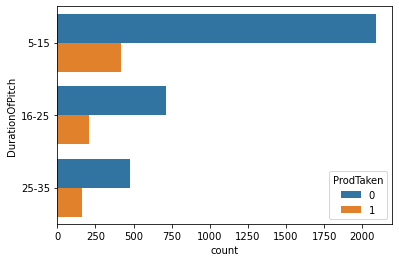

In [58]:
sns.countplot(y=df["DurationOfPitch"],hue=df["ProdTaken"])

In [59]:
##Most Customer are from duration of 5-15 Duration of Pitch
##Best rate of purchasing Package is from 25-35 Duration of Pitch
num_features

Index(['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting'],
      dtype='object')

In [60]:
num_features=df.select_dtypes([float,int]).columns
print(len(num_features))
num_features

10


Index(['ProdTaken', 'CityTier', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting'],
      dtype='object')

In [61]:
total=len(df["CityTier"])
print(total)
taken=len(df[df["ProdTaken"]==1]["CityTier"])
print(taken)
taken_rate=round((taken/total)*100,1)
print(f"{taken_rate}%")


4111
793
19.3%


In [62]:
for i in range(len(num_features)):
    print(f"Column Name: {num_features[i]}")
    print(df[num_features[i]].value_counts())
    taken_data=df[df["ProdTaken"]==1]
    total=len(taken_data)
    indexes=taken_data[num_features[i]].value_counts().index
    values=taken_data[num_features[i]].value_counts().values
    
    for j,k in zip(indexes,values):
        print(f" {j} is a  category of the {num_features[i]} with {k} values out of {total}, this is {round(k/total*100,0)}% rate of the Purchasing the Package.")

    print("<<"*30)
    print("<<"*30)

Column Name: ProdTaken
0    3318
1     793
Name: ProdTaken, dtype: int64
 1 is a  category of the ProdTaken with 793 values out of 793, this is 100.0% rate of the Purchasing the Package.
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Column Name: CityTier
1    2663
3    1286
2     162
Name: CityTier, dtype: int64
 1 is a  category of the CityTier with 439 values out of 793, this is 55.0% rate of the Purchasing the Package.
 3 is a  category of the CityTier with 311 values out of 793, this is 39.0% rate of the Purchasing the Package.
 2 is a  category of the CityTier with 43 values out of 793, this is 5.0% rate of the Purchasing the Package.
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Column Name: NumberOfPersonVisiting
3    2065
2    1087
4     928
1      28
5       3
Name: NumberOfPersonVisiting, dtype: int64
 3 is a  category of the 

In [63]:
for i in range(len(num_features)):
    print(f"Column Name: {num_features[i]}")
    print(df[num_features[i]].value_counts())
    main_values=df[num_features[i]].value_counts().values
    taken_data=df[df["ProdTaken"]==1]
    total=len(taken_data)
    indexes=taken_data[num_features[i]].value_counts().index
    values=taken_data[num_features[i]].value_counts().values
    
    for j,k,m in zip(indexes,values,main_values):
        print(f""" <<{j}>> is a  category of the {num_features[i]} with {k} values which has been Purchae the package out of {total} and 
        Total values  {m}: this values is total number of category in whole data, this is {round(k/m*100,0)}% rate of the Purchasing
        the Package.""")

    print("<<"*30)
    print("<<"*30)
    

Column Name: ProdTaken
0    3318
1     793
Name: ProdTaken, dtype: int64
 <<1>> is a  category of the ProdTaken with 793 values which has been Purchae the package out of 793 and 
        Total values  3318: this values is total number of category in whole data, this is 24.0% rate of the Purchasing
        the Package.
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Column Name: CityTier
1    2663
3    1286
2     162
Name: CityTier, dtype: int64
 <<1>> is a  category of the CityTier with 439 values which has been Purchae the package out of 793 and 
        Total values  2663: this values is total number of category in whole data, this is 16.0% rate of the Purchasing
        the Package.
 <<3>> is a  category of the CityTier with 311 values which has been Purchae the package out of 793 and 
        Total values  1286: this values is total number of category in whole data, this is 24.0% rate of the Purchasing
      

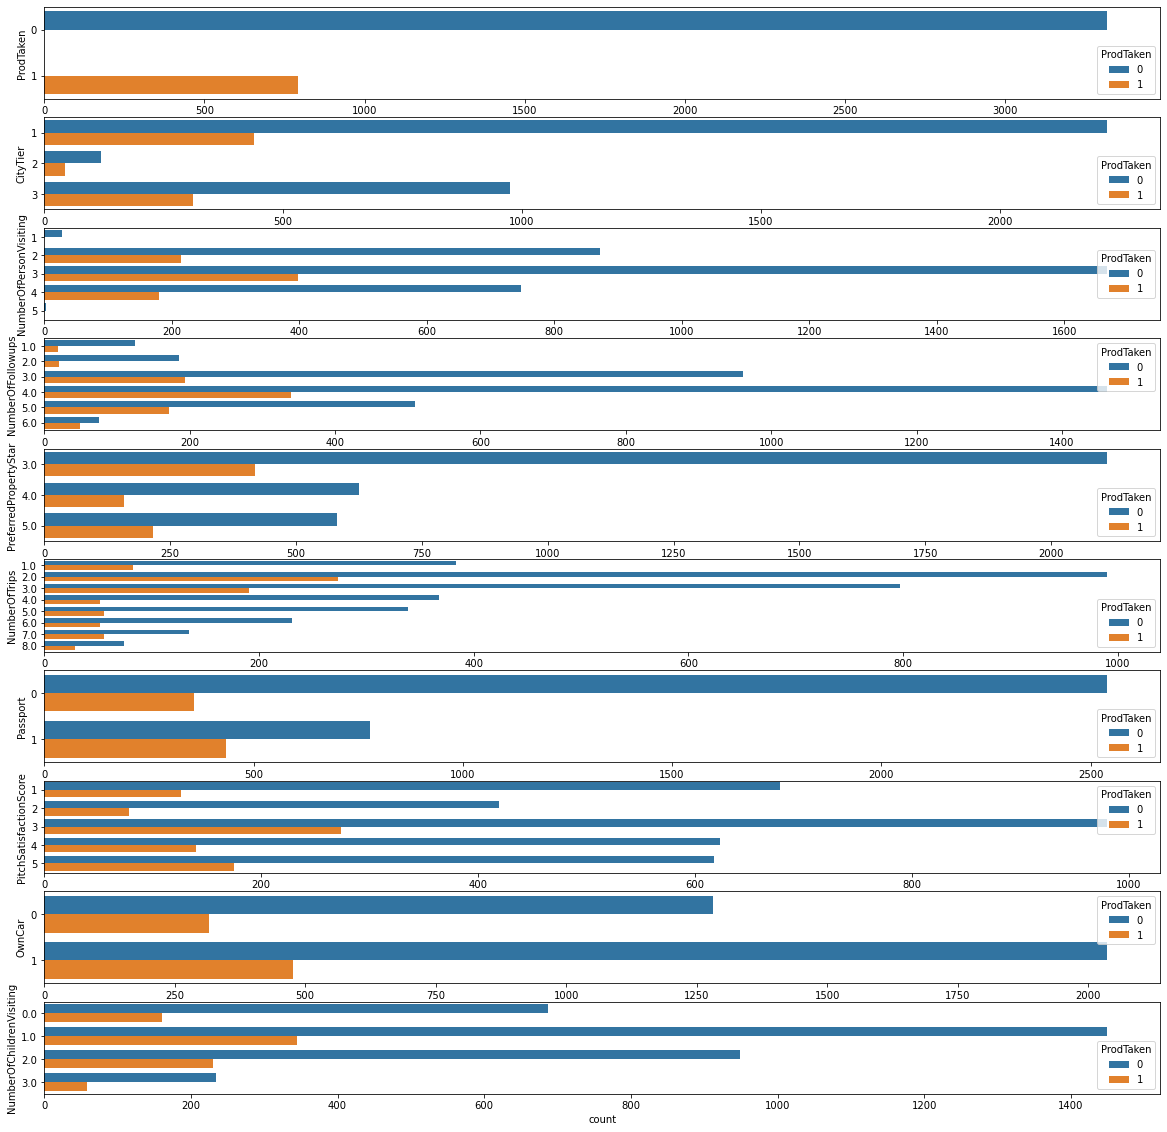

In [64]:
fig,ax=plt.subplots(10,figsize=(20,20))
for i in range(len(num_features)):
    sns.countplot(y=df[num_features[i]],ax=ax[i],hue=df["ProdTaken"])


In [65]:
##Feature Selection

In [66]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [67]:
data1=data.dropna()
data1.shape

(4125, 20)

In [68]:
data1.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Unmarried,1.0,0,5,1,1.0,Executive,18068.0


In [69]:
cat_features

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [70]:
data1.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Unmarried,1.0,0,5,1,1.0,Executive,18068.0


In [71]:
cat_features=data1.select_dtypes(object).columns
cat_features

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [72]:
def dummies(data1,column_name_list):
    data1= pd.get_dummies(data1, columns=column_name_list)
    return data1

In [73]:
data1=dummies(data1,cat_features)

In [74]:
data1

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,...,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,200000,1,41.0,3,6.0,3,3.0,3.0,1.0,1,...,0,0,0,0,1,0,0,1,0,0
1,200001,0,49.0,1,14.0,3,4.0,4.0,2.0,0,...,0,0,1,0,0,0,0,1,0,0
2,200002,1,37.0,1,8.0,3,4.0,3.0,7.0,1,...,0,0,0,0,1,0,1,0,0,0
3,200003,0,33.0,1,9.0,2,3.0,3.0,2.0,1,...,0,0,1,0,0,0,1,0,0,0
5,200005,0,32.0,1,8.0,3,3.0,3.0,1.0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,3,9.0,3,5.0,4.0,2.0,1,...,0,0,0,0,1,0,0,1,0,0
4884,204884,1,28.0,1,31.0,4,5.0,3.0,3.0,1,...,0,0,0,0,1,0,1,0,0,0
4885,204885,1,52.0,3,17.0,4,4.0,4.0,7.0,0,...,1,0,0,1,0,0,0,0,1,0
4886,204886,1,19.0,3,16.0,3,4.0,3.0,3.0,0,...,0,0,0,0,1,0,1,0,0,0


In [75]:
data1.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome',
       'TypeofContact_Company Invited', 'TypeofContact_Self Enquiry',
       'Occupation_Free Lancer', 'Occupation_Large Business',
       'Occupation_Salaried', 'Occupation_Small Business', 'Gender_Female',
       'Gender_Male', 'ProductPitched_Basic', 'ProductPitched_Deluxe',
       'ProductPitched_King', 'ProductPitched_Standard',
       'ProductPitched_Super Deluxe', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Unmarried', 'Designation_AVP',
       'Designation_Executive', 'Designation_Manager',
       'Designation_Senior Manager', 'Designation_VP'],
      dtype='object')

In [76]:
##Feature Selection
## Using the Heatplot on the basis of Correlation

<AxesSubplot:>

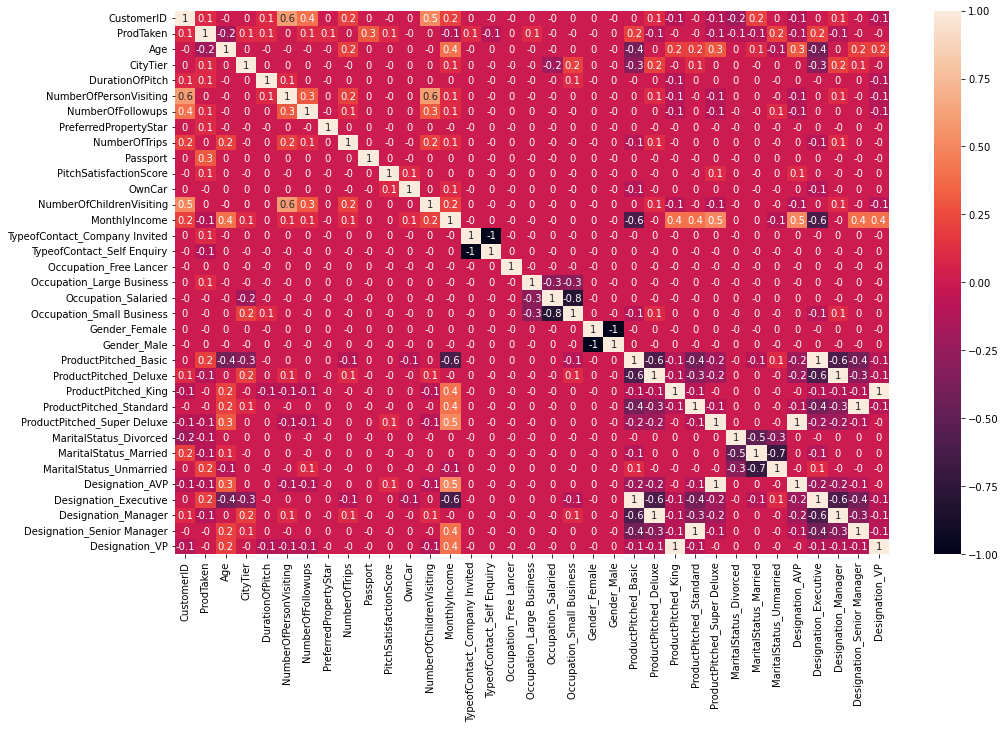

In [77]:
plt.figure(figsize=(16,10))
sns.heatmap(round(data1.corr(),1),annot=True)